In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cluster_mpg.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


In [7]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [8]:
df_w_dummies = pd.get_dummies(df.drop('name',axis=1))

In [9]:
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
X = df_w_dummies

In [14]:
scaled_X = scaler.fit_transform(X)

In [16]:
scaled_df = pd.DataFrame(scaled_X,columns=df_w_dummies.columns)

In [17]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


<AxesSubplot:>

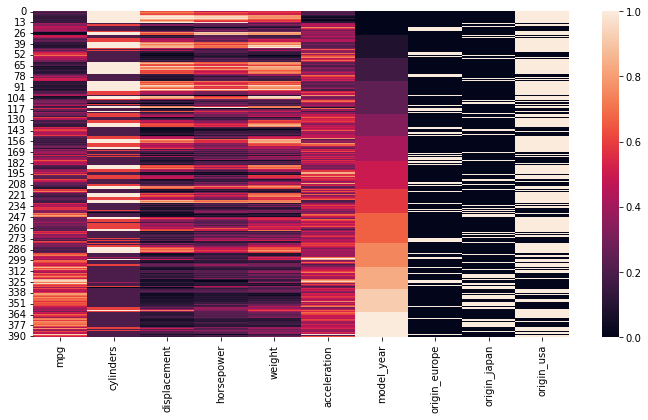

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(scaled_df)

<Figure size 864x432 with 0 Axes>

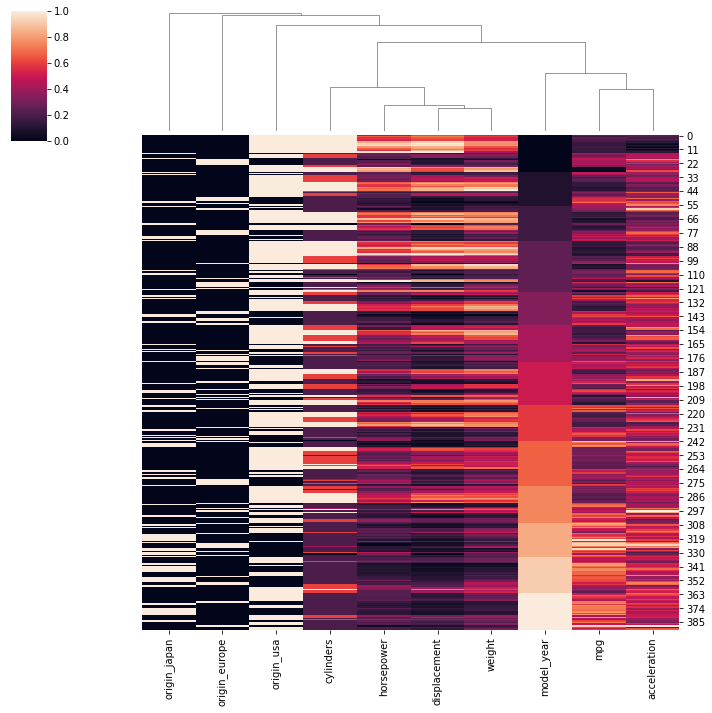

In [20]:
plt.figure(figsize=(12,6))
sns.clustermap(scaled_df,row_cluster=False);

<AxesSubplot:>

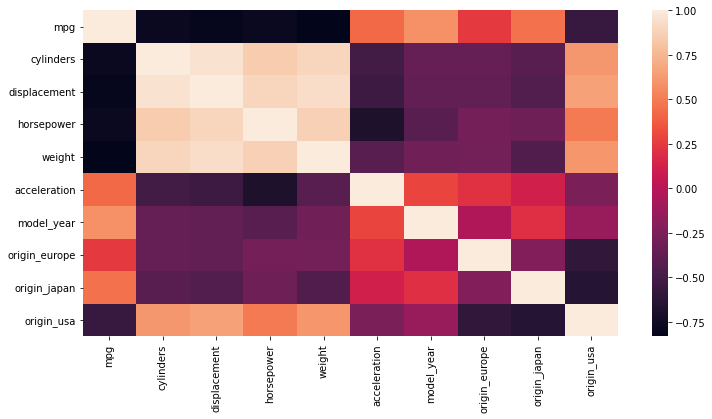

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(scaled_df.corr())

<Figure size 864x432 with 0 Axes>

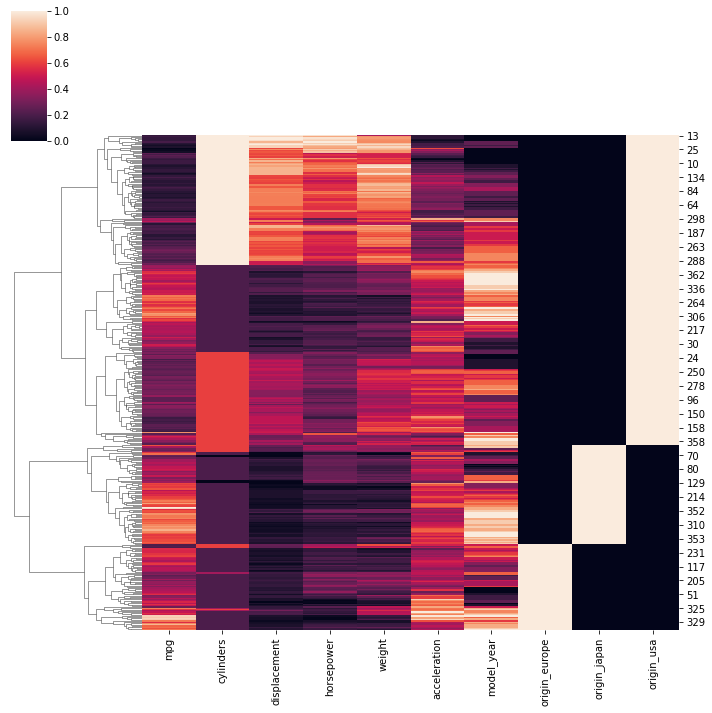

In [23]:
plt.figure(figsize=(12,6))
sns.clustermap(scaled_df,col_cluster=False);

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
model = AgglomerativeClustering(n_clusters=4)

In [26]:
cluster_labels = model.fit_predict(scaled_df)

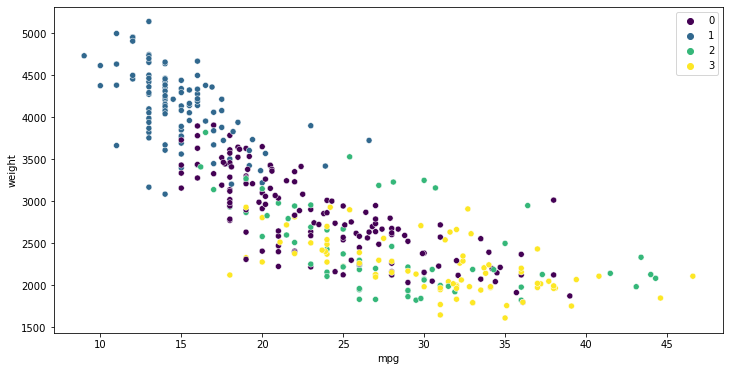

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='mpg',y='weight',
                hue=cluster_labels,palette='viridis');

In [32]:
model = AgglomerativeClustering(n_clusters=None,
                               distance_threshold=0)

In [33]:
cluster_labels = model.fit_predict(scaled_df)

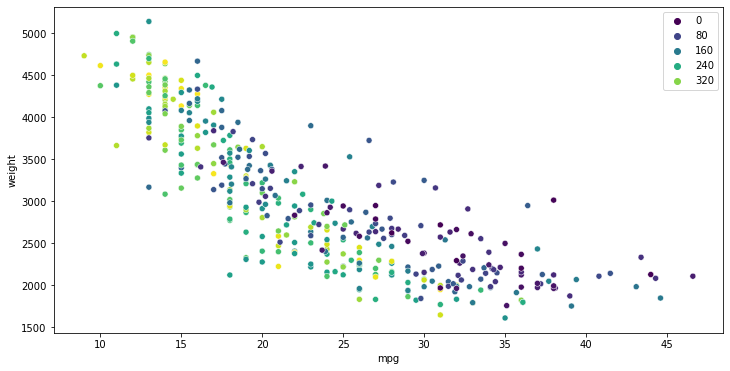

In [34]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='mpg',y='weight',
                hue=cluster_labels,palette='viridis');

In [39]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [38]:
linkage_matrix = hierarchy.linkage(model.children_)

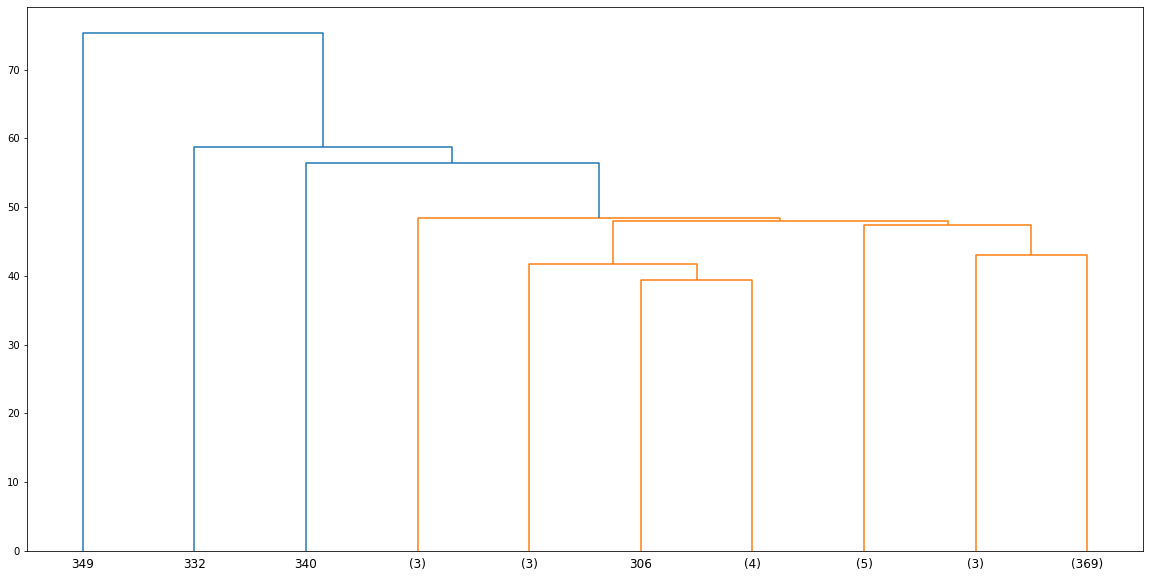

In [41]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix,
                   truncate_mode='lastp',p=10)

In [42]:
model = AgglomerativeClustering(n_clusters=None,
                               distance_threshold=2)

In [43]:
cluster_labels = model.fit_predict(scaled_df)

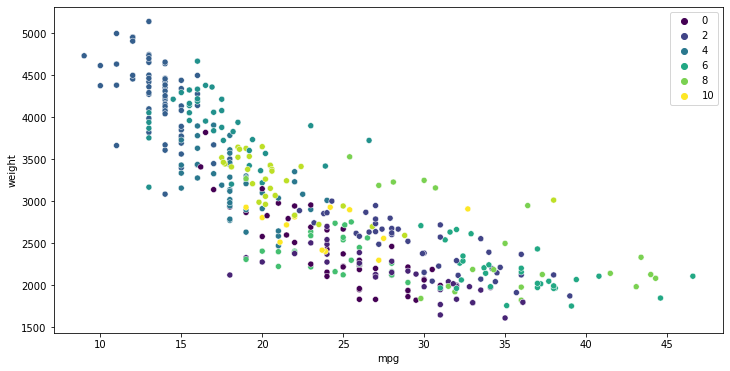

In [44]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='mpg',y='weight',
                hue=cluster_labels,palette='viridis');